In [16]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In this task, K-Nearest Neighbors (KNN) is used to classify handwritten digit images based on distance measurement.

In [17]:
digits = load_digits()

X = digits.data
y = digits.target

In [18]:
print("Feature shape:", X.shape)
print("Target shape:", y.shape)

Feature shape: (1797, 64)
Target shape: (1797,)


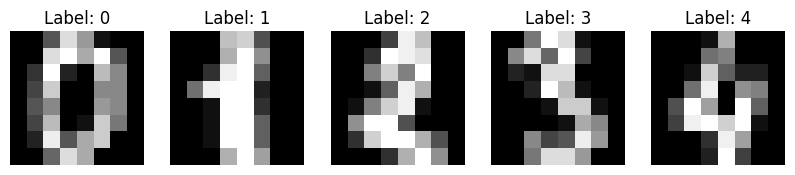

In [19]:
plt.figure(figsize=(10,4))

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')

plt.show()

Sample handwritten digit images were visualized to verify correct labeling and image clarity.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

The dataset was split into training and testing sets to evaluate model performance on unseen data.

In [21]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Feature scaling is required for KNN because it relies on distance calculations.

In [22]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy with K=3:", accuracy)

Accuracy with K=3: 0.9694444444444444


KNN model was trained with K=3 and evaluated using accuracy metric.

In [24]:
k_values = [3, 5, 7, 9]
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc)
    print(f"Accuracy for K={k}: {acc}")

Accuracy for K=3: 0.9694444444444444
Accuracy for K=5: 0.975
Accuracy for K=7: 0.9722222222222222
Accuracy for K=9: 0.9722222222222222


Different K values were tested to observe their effect on model accuracy.

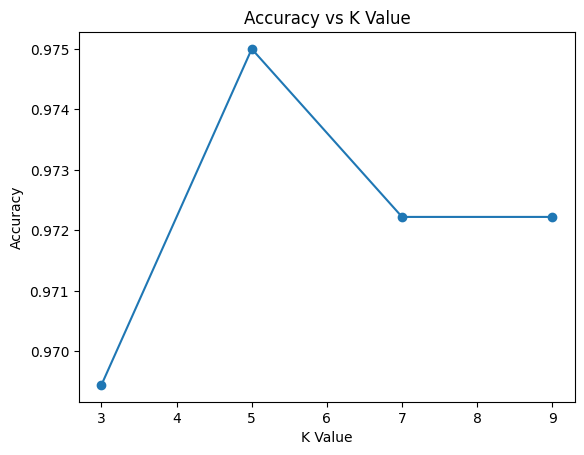

In [25]:
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K Value")
plt.show()

The Accuracy vs K plot helps in selecting the optimal number of neighbors.

In [26]:
best_k = k_values[np.argmax(accuracies)]
print("Best K:", best_k)

best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)

y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

Best K: 5


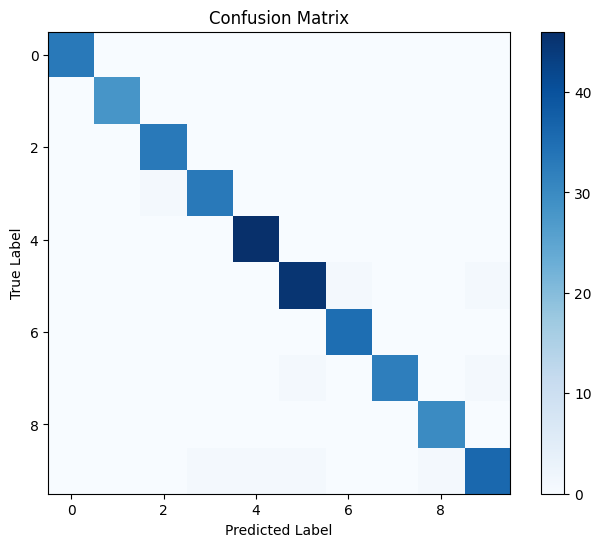

In [27]:
plt.figure(figsize=(8,6))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

The confusion matrix shows correct and incorrect digit classifications.

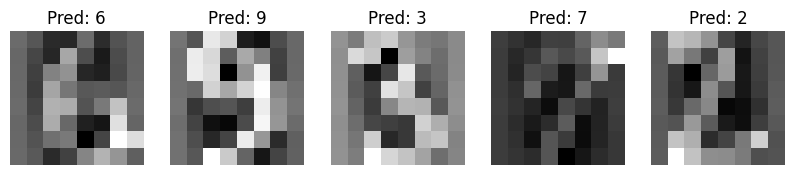

In [28]:
plt.figure(figsize=(10,4))

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[i].reshape(8,8), cmap='gray')
    plt.title(f"Pred: {y_pred_best[i]}")
    plt.axis('off')

plt.show()

Sample test images were displayed with their predicted digit labels.